# Streaming-platform Analysis

The dataset contains 15 days of overall plays activity from users on a online streaming platform.

In this notebook, I'll go over the process to do exploratory analysis to understand the data and then conduct ANOVA test and create correlation matrix to see what might caused the buffering. In the end of the notebook, there will be answers for several questions given.

## Table of Content

1. [Load the Data](#b)
2. [Missing Value](#a)
3. [Exploratory Data Analysis](#c)
4. [Buffering Problem](#d)
5. [Conclusion](#e)


## 1. Load the Data
<a id='b'></a>

In [48]:
# import library

import gzip
import csv
import json
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:20,.2f}'.format

In [4]:
# insert back the dataset
df = pd.read_csv('out2.csv')

In [5]:
df.head()

,hash_content_id,hash_play_id,hash_visit_id,hash_watcher_id,hash_film_id,hash_event_id,is_login,playback_location,platform,play_time,...,app_version,city,play_duration,content_type,stream_type,title,category_name,film_title,season_name,genre_name
0,0096dafb1049ee942e8e7cbad5abf4a46dc92e3995caac...,0162f124f5bd61592d9bca6aaa3b1b6097a00b62ef33c9...,27dfffe2bb74f8767caeb64ac4c92e9eaf4b11a28ef7e1...,e7c2138fd9d4047356066a01de46fc22ee9955a6fd6679...,NaN,c81bd64a212d3b5cb227499a6b4a3dc607748ae5133e48...,False,embed,web-mobile,2020-02-02T10:21:20.000Z,...,NaN,nan,0,vod,NaN,KiprahEksPemainJuventusyangDikaitkandenganPersija,Sports,NaN,NaN,NaN
1,01e34cb2658d0461f220bda493cb38427eef7de1e23e6e...,38976454aec1c7ff4ca0a35df8821db29227443352e705...,f23800acfeede429803cb2a1380ca7652067fb35d079a8...,bba3183af4f6c29d97dce6ee557561e3feef31d19ae9ab...,NaN,ed0731e9861306e6e26cf3cfb5a43da6b0e19af3ff3ff5...,False,embed,web-mobile,2020-02-02T13:45:05.000Z,...,NaN,nan,0,vod,NaN,5KelebihanMikelArtetaMenurutPepGuardiola,Sports,NaN,NaN,NaN
2,01e34cb2658d0461f220bda493cb38427eef7de1e23e6e...,4b4ee4aa4c37519250aa6efbd78e789b40d976474a1c37...,b058895b6fce58bcfbd72bfd7a3dfa4ae01d094e21c976...,317ecdb779c3ba5bdc1818405aaafebcef35e9582c42e5...,NaN,3679f65950032d6bff1323df5b29292adad99918d616ae...,False,embed,web-desktop,2020-02-02T13:23:40.000Z,...,NaN,nan,4,vod,NaN,5KelebihanMikelArtetaMenurutPepGuardiola,Sports,NaN,NaN,NaN
3,01e34cb2658d0461f220bda493cb38427eef7de1e23e6e...,fe108e8c2b02076084bb394d1614ac4f54b3fd0fbec824...,8d62f09ec75ee9e690125bf05f004692586cad2122ea29...,8f939dcc6de53622457985c1cccb80f9f3dac049d37243...,NaN,9e444d2afa0814830b73862556002263ea7035d1cfa4f7...,False,embed,web-mobile,2020-02-02T10:47:10.000Z,...,NaN,nan,0,vod,NaN,5KelebihanMikelArtetaMenurutPepGuardiola,Sports,NaN,NaN,NaN
4,034ab1b19ac4e85f99481b8e97de7cdefaf9d929277fb5...,027a275d857e562457a606b3716125f68c0ce06e039556...,4c1b550e81cdaf85c343be628c9083fa67815805f39982...,fb3a5607faeb16e62b68e3a0ce3e950bbd413913d8ee2d...,28955b1fb53203e2ff246fd2d4c3e148d4666a617469cd...,2694f8085b635aae0167669ae34d08bb3b639dff3955fe...,True,direct,app-android,2020-02-02T07:56:10.000Z,...,2.9.4,nan,0,vod,NaN,"SamudraCinta-Episode1,2dan3",TVShow,Samudra1-50,Sinetron,NaN


In [6]:
# show dataset shape
df.shape

(93409, 41)

In [7]:
# show dataset columns
list(df.columns.values)

['hash_content_id',
 'hash_play_id',
 'hash_visit_id',
 'hash_watcher_id',
 'hash_film_id',
 'hash_event_id',
 'is_login',
 'playback_location',
 'platform',
 'play_time',
 'end_time',
 'referrer',
 'average_bitrate',
 'bitrate_range',
 'total_bytes',
 'buffer_duration',
 'referrer_group',
 'completed',
 'utm_source',
 'utm_medium',
 'utm_campaign',
 'player_name',
 'has_ad',
 'flash_version',
 'os_name',
 'os_version',
 'browser_name',
 'browser_version',
 'app_name',
 'autoplay',
 'is_premium',
 'app_version',
 'city',
 'play_duration',
 'content_type',
 'stream_type',
 'title',
 'category_name',
 'film_title',
 'season_name',
 'genre_name']

In [8]:
# show missing value in each column
df.isna().sum()

hash_content_id          0
hash_play_id             0
hash_visit_id            0
hash_watcher_id          0
hash_film_id         91178
hash_event_id            0
is_login                 0
playback_location        0
platform                 0
play_time                0
end_time                 0
referrer              5145
average_bitrate       4456
bitrate_range            0
total_bytes              0
buffer_duration          0
referrer_group           0
completed            36999
utm_source           93367
utm_medium           93367
utm_campaign         93387
player_name           1741
has_ad                   0
flash_version        29139
os_name              28114
os_version             237
browser_name         29139
browser_version      30297
app_name                 0
autoplay             37017
is_premium               0
app_version          64283
city                 93409
play_duration            0
content_type             0
stream_type          56410
title                    0
c

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93409 entries, 0 to 93408
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hash_content_id    93409 non-null  object 
 1   hash_play_id       93409 non-null  object 
 2   hash_visit_id      93409 non-null  object 
 3   hash_watcher_id    93409 non-null  object 
 4   hash_film_id       2231 non-null   object 
 5   hash_event_id      93409 non-null  object 
 6   is_login           93409 non-null  bool   
 7   playback_location  93409 non-null  object 
 8   platform           93409 non-null  object 
 9   play_time          93409 non-null  object 
 10  end_time           93409 non-null  object 
 11  referrer           88264 non-null  object 
 12  average_bitrate    88953 non-null  float64
 13  bitrate_range      93409 non-null  object 
 14  total_bytes        93409 non-null  int64  
 15  buffer_duration    93409 non-null  float64
 16  referrer_group     934

## 2. Missing Value
<a id='a'></a>

In [10]:
# insert "OTHERS" to the null values in the columns that has string datatype

df['hash_film_id'] = df['hash_film_id'].replace({ np.nan: 'OTHERS'})
df['referrer'] = df['referrer'].replace({ np.nan: 'OTHERS'})
df['utm_source'] = df['utm_source'].replace({ np.nan: 'OTHERS'})
df['utm_medium'] = df['utm_medium'].replace({ np.nan: 'OTHERS'})
df['utm_campaign'] = df['utm_campaign'].replace({ np.nan: 'OTHERS'})
df['flash_version'] = df['flash_version'].replace({ np.nan: 'OTHERS'})
df['os_name'] = df['os_name'].replace({ np.nan: 'Other'})
df['os_version'] = df['os_version'].replace({ np.nan: 'OTHERS'})
df['browser_name'] = df['browser_name'].replace({ np.nan: 'Other'})
df['browser_version'] = df['browser_version'].replace({ np.nan: 'OTHERS'})
df['app_version'] = df['app_version'].replace({ np.nan: 'OTHERS'})
df['category_name'] = df['category_name'].replace({ np.nan: 'OTHERS'})
df['film_title'] = df['film_title'].replace({ np.nan: 'OTHERS'})
df['season_name'] = df['season_name'].replace({ np.nan: 'OTHERS'})
df['genre_name'] = df['genre_name'].replace({ np.nan: 'OTHERS'})

In [11]:
# insert MODE of the column to the missing values of column with bool datatypes

df['completed'] = df['completed'] .fillna(df['completed'].mode()[0])
df['player_name'] = df['player_name'] .fillna(df['player_name'].mode()[0])
df['autoplay'] = df['autoplay'] .fillna(df['autoplay'].mode()[0])
df['stream_type'] = df['stream_type'] .fillna(df['stream_type'].mode()[0])


In [12]:
# insert MEDIAN to the column to the missing values of column with float64 datatype
df['average_bitrate'] = df['average_bitrate'] .fillna(df['average_bitrate'].median())

In [13]:
# drop city because no values
df.drop('city',inplace=True, axis=1)


In [14]:
df.isna().sum()

hash_content_id      0
hash_play_id         0
hash_visit_id        0
hash_watcher_id      0
hash_film_id         0
hash_event_id        0
is_login             0
playback_location    0
platform             0
play_time            0
end_time             0
referrer             0
average_bitrate      0
bitrate_range        0
total_bytes          0
buffer_duration      0
referrer_group       0
completed            0
utm_source           0
utm_medium           0
utm_campaign         0
player_name          0
has_ad               0
flash_version        0
os_name              0
os_version           0
browser_name         0
browser_version      0
app_name             0
autoplay             0
is_premium           0
app_version          0
play_duration        0
content_type         0
stream_type          0
title                0
category_name        0
film_title           0
season_name          0
genre_name           0
dtype: int64

## 3. Exploratory Data Analysis
<a id='c'></a>

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93409 entries, 0 to 93408
Data columns (total 40 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hash_content_id    93409 non-null  object 
 1   hash_play_id       93409 non-null  object 
 2   hash_visit_id      93409 non-null  object 
 3   hash_watcher_id    93409 non-null  object 
 4   hash_film_id       93409 non-null  object 
 5   hash_event_id      93409 non-null  object 
 6   is_login           93409 non-null  bool   
 7   playback_location  93409 non-null  object 
 8   platform           93409 non-null  object 
 9   play_time          93409 non-null  object 
 10  end_time           93409 non-null  object 
 11  referrer           93409 non-null  object 
 12  average_bitrate    93409 non-null  float64
 13  bitrate_range      93409 non-null  object 
 14  total_bytes        93409 non-null  int64  
 15  buffer_duration    93409 non-null  float64
 16  referrer_group     934

In [16]:
df.describe()

,average_bitrate,total_bytes,buffer_duration,play_duration
count,"93,409.00","93,409.00","93,409.00","93,409.00"
mean,"204,548.89","82,038,889.14","259,434.47",396.97
std,"139,501.89","491,093,252.26","79,181,003.58","1,560.81"
min,144.00,0.00,0.00,0.00
25%,700.00,750.00,0.01,5.00
50%,"300,000.00","585,000.00",1.00,41.00
75%,"300,000.00","11,250,000.00",6.00,115.00
max,"300,000.00","30,920,625,000.00","24,200,000,000.00","82,455.00"


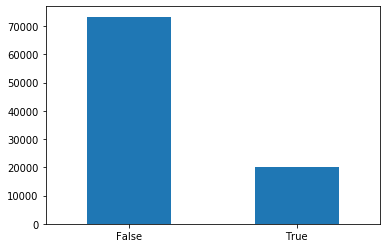

In [17]:
# How many watcher log in into their account when streaming in Vidio?
df['is_login'].value_counts().plot(kind="bar", rot=0)

**Notes:**
1. Many watcher in this dataset didn't log in

<a id='f'></a>

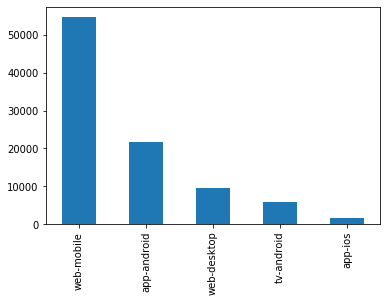

In [18]:
# What platform that user keenly watch?
df['platform'].value_counts().plot(kind="bar", rot=90)

In [19]:
df.groupby(['platform'])['hash_content_id'].count().sort_values(ascending=False)

platform
web-mobile     54717
app-android    21779
web-desktop     9553
tv-android      5818
app-ios         1542
Name: hash_content_id, dtype: int64

In [20]:
# Favourite platform baseed on total play duration
df.groupby(['platform'])['play_duration'].sum().sort_values(ascending=False)

platform
app-android    16965485
web-mobile      6865173
tv-android      6617523
web-desktop     5864694
app-ios          767531
Name: play_duration, dtype: int64

In [21]:
# Favourite platform based on the content 
df.groupby(['content_type','platform'])['hash_content_id'].count().sort_values(ascending=False)

content_type   platform   
vod            web-mobile     47046
livestreaming  app-android    17933
               web-mobile      7576
               tv-android      5636
vod            web-desktop     4913
livestreaming  web-desktop     4569
vod            app-android     3662
livestreaming  app-ios         1285
vod            app-ios          235
catchup        app-android      184
vod            tv-android       182
catchup        web-mobile        95
               web-desktop       71
               app-ios           22
Name: hash_content_id, dtype: int64

In [22]:
# Browser used for the platform
df.groupby(['platform','browser_name'])['hash_content_id'].count().sort_values(ascending=False)

platform     browser_name       
app-android  Other                  21779
web-mobile   Facebook               18721
             ChromeMobile           17517
web-desktop  Chrome                  7369
web-mobile   ChromeMobileWebView     6798
                                    ...  
web-desktop  ChromeMobile               1
web-mobile   Pinterest                  1
web-desktop  AmazonSilk                 1
             LINE                       1
             Waterfox                   1
Name: hash_content_id, Length: 64, dtype: int64

In [23]:
# Browser used for the platform
df.groupby(['stream_type','platform'])['hash_content_id'].count().sort_values(ascending=False)

stream_type  platform   
TvStream     web-mobile     54717
             app-android    21776
             web-desktop     9552
             tv-android      5818
             app-ios         1541
EventStream  app-android        3
             web-desktop        1
             app-ios            1
Name: hash_content_id, dtype: int64

**Notes:**
Check in [here](#g)

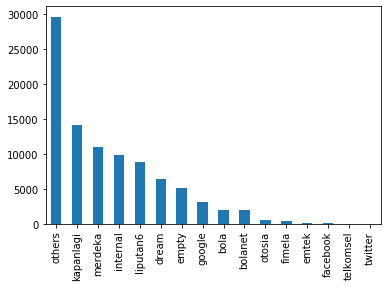

In [24]:
# Where does the content in Vidio mostly coming from?
df['referrer_group'].value_counts().plot(kind="bar", rot=90)

**Notes:**
1. The source of Vidio content mostly not mentioned here
2. Besides that, the top three sources of the contents are **kapanlagi, merdeka, internal.**

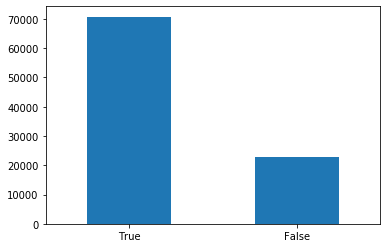

In [25]:
# Does the watcher often received ads?
df['has_ad'].value_counts().plot(kind="bar", rot=0)

There are 92907 non-premium visitors and 502 premium visitors.


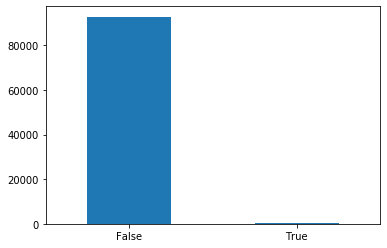

In [26]:
# How many are premium watcher here?
df['is_premium'].value_counts().plot(kind="bar", rot=0)
print(f"There are {len (df.loc[df['is_premium'] == False])} non-premium visitors and {len (df.loc[df['is_premium'] == True])} premium visitors.")

In [27]:
# Does premium visitors still receive ads?
df.groupby(['has_ad','is_premium'])['hash_content_id'].count()

has_ad  is_premium
False   False         22183
        True            502
True    False         70724
Name: hash_content_id, dtype: int64

**Notes:**
1. Most of the visitors got ad.
2. Most of the visitors are non-premium.
3. Only non-premium visitors got adds.

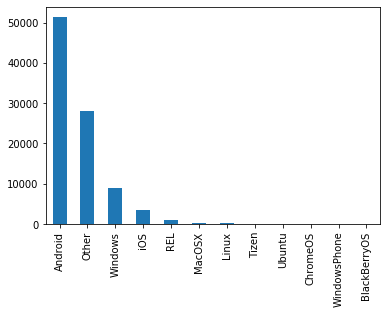

In [28]:
# What OS that the users mostly use to watch the content?
df['os_name'].value_counts().plot(kind="bar", rot=90)

**Notes:**<br>
Most OS used by the visitors are **Android, Windows, and iOS.**

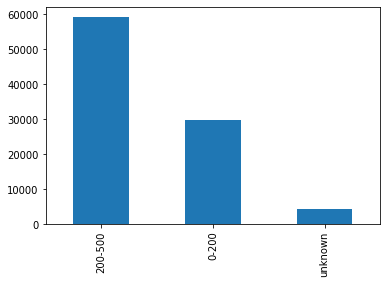

In [29]:
# What bitrate range mostly set by the watcher?
df['bitrate_range'].value_counts().plot(kind="bar", rot=90)

**Notes:**<br>
Most users set its bitrange in **200-500.**

In [30]:
# What is the type of browser that used by watcher to stream?
fav_browser = df.groupby(['browser_name'])['hash_watcher_id'].count().sort_values(ascending=False)
fav_browser.head(10)

browser_name
Other                  29142
Facebook               18776
ChromeMobile           17518
Chrome                  7637
ChromeMobileWebView     6833
UCBrowser               3232
OperaMobile             2041
SamsungInternet         2008
MobileSafari            1530
Firefox                 1344
Name: hash_watcher_id, dtype: int64

**Notes:**<br>
Most of the users access the content from **Facebook, ChromeMobile, and Chrome.**

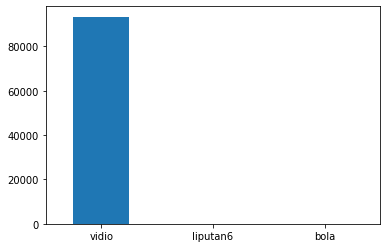

In [31]:
# Which app mostly used?
df['app_name'].value_counts().plot(kind="bar", rot=0)

**Notes:**<br>
**Vidio** is mostly used compare to liputan6 and bola.

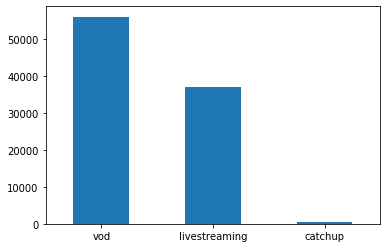

In [32]:
# What type of content is watcher's favourite?
df['content_type'].value_counts().plot(kind="bar", rot=0)

In [33]:
# What is the type of content that mostly watch?
df.groupby(['content_type'])['hash_watcher_id'].count().sort_values(ascending=False)

content_type
vod              56038
livestreaming    36999
catchup            372
Name: hash_watcher_id, dtype: int64

**Notes:**<br>
Most users tend to access **VoD and Live Streaming** content compared to catchup content.

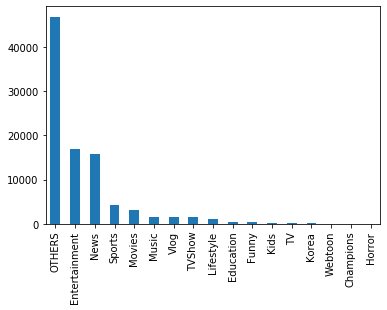

In [34]:
df['category_name'].value_counts().plot(kind="bar", rot=90)

In [35]:
# Favourite platform baseed on total play duration
df.groupby(['category_name'])['play_duration'].sum().sort_values(ascending=False)

category_name
OTHERS           28111466
Movies            2970750
TVShow            2602159
Vlog               890463
Entertainment      808627
Music              741924
News               549513
TV                 131832
Sports             131735
Kids                33917
Lifestyle           33721
Korea               33036
Funny               14173
Education           13630
Webtoon             11248
Champions            1418
Horror                794
Name: play_duration, dtype: int64

**Notes:**<br>
1. Most of the content's category is unknown(OTHERS).
2. From the data given, visitors tend to access **Entertainment, News, and Sports** contents.
3. Visitors who access **Movies, TVShow, and Vlog** has the longest total play duration.

In [36]:
# Top 10 visitors by play duration
top_visitor=df.groupby(['hash_watcher_id'])['play_duration'].sum().sort_values(ascending=False)
top_visitor.head(10)

hash_watcher_id
e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b934ca495991b7852b855    929089
1037f78e497361fcf21323b537e1f05264f26ee233697c052a679b0756699a39     82455
8396a2cdf048462cb24f81225433524783116200a71bc502e3562bbd0b5958d6     77280
83f4d120aaa71c673ceae6733feb59687272e7a00e2bc95baf46db98d4acab59     75720
3986f1f1ffaa52af465c60e8114e06f54e8a7aa332b109324e103d93de0eb954     55080
7d758d0ffbd18ed056934f14b668d45d48928d4e382fcb9fa4db1b52d3229078     46410
133af93c4a0191b2d31fecb34b7653836abe32b769be2329dcc20696607a55bb     45375
d66753dcaf5b192ce7233bd69e7d935101c3ad7b6b2e29658dd2bd48d50b3933     44715
6a077b17388304fc64b0ea4e1ab1c04d72d1e9aa100b18155a144dc7c18081cc     42750
c21fc26bb40aaebe523a23920f5f7f622f38e80cc51796886100be58fa797ea7     42120
Name: play_duration, dtype: int64

#### Top 10 visitors by using play_duration per day?
<a id='z'></a>

In [37]:
# change play_time and end_time into datetime format
df['play_time'] = pd.to_datetime(df['play_time']).dt.tz_convert('Australia/Sydney')
df['end_time'] = pd.to_datetime(df['end_time']).dt.tz_convert('Australia/Sydney')

In [38]:
# create 'play_day' to know the date the user starts playing the content
df['play_day'] = df['play_time'].dt.date

In [39]:
# Top 10 visitors by using play_duration per day (based on the day he/she starts play the content)
play_duration_day=df.groupby(['play_day','hash_watcher_id'], as_index=False)['play_duration'].sum()

In [40]:
play_duration_day = play_duration_day.sort_values(by=['play_duration'],ignore_index=True,ascending=[False])

In [41]:
play_duration_day.head(10)

,play_day,hash_watcher_id,play_duration
0,2020-02-06,e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b93...,129705
1,2020-02-03,e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b93...,114402
2,2020-02-14,1037f78e497361fcf21323b537e1f05264f26ee233697c...,82455
3,2020-02-09,8396a2cdf048462cb24f81225433524783116200a71bc5...,77280
4,2020-02-09,e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b93...,71704
5,2020-02-02,e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b93...,69735
6,2020-02-13,e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b93...,67505
7,2020-02-10,e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b93...,63995
8,2020-02-16,e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b93...,55980
9,2020-02-04,e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b93...,55725


**Notes:**
Check in [here](#y)

In [42]:
# See the average buffer duration in member and non-member watcher
df.groupby(['is_premium'])['buffer_duration'].mean().sort_values(ascending=False)

is_premium
False             260,832.93
True                  616.46
Name: buffer_duration, dtype: float64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93409 entries, 0 to 93408
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype                           
---  ------             --------------  -----                           
 0   hash_content_id    93409 non-null  object                          
 1   hash_play_id       93409 non-null  object                          
 2   hash_visit_id      93409 non-null  object                          
 3   hash_watcher_id    93409 non-null  object                          
 4   hash_film_id       93409 non-null  object                          
 5   hash_event_id      93409 non-null  object                          
 6   is_login           93409 non-null  bool                            
 7   playback_location  93409 non-null  object                          
 8   platform           93409 non-null  object                          
 9   play_time          93409 non-null  datetime64[ns, Australia/Sydney]
 10  end_time  

## 4. Buffering Problem
<a id='d'></a>

In this part, I try to see what might cause buffering problem for the visitors by considering only several variables from the dataset.

In [44]:
df['buffer_duration'].describe()

count              93,409.00
mean              259,434.47
std            79,181,003.58
min                     0.00
25%                     0.01
50%                     1.00
75%                     6.00
max        24,200,000,000.00
Name: buffer_duration, dtype: float64

In [45]:
# generate 'is_buffer' to see the percentage of the visitors that has buffering
df['is_buffer'] = (df['buffer_duration'] > 0).astype(bool)
df['is_buffer'].value_counts(normalize=True)

True                    0.75
False                   0.25
Name: is_buffer, dtype: float64

**Notes:**<br>
3/4 of the visitors suffers buffering problem. That's why it is important to see what might caused the buffering.

In [46]:
# show the outliers in buffer_duration
def get_iqr_values(df_in, col_name):
    median = df_in[col_name].median()
    q1 = df_in[col_name].quantile(0.25) # 25th percentile / 1st quartile
    q3 = df_in[col_name].quantile(0.75) # 7th percentile / 3rd quartile
    iqr = q3-q1 #Interquartile range
    minimum  = q1-1.5*iqr # The minimum value or the |- marker in the box plot
    maximum = q3+1.5*iqr # The maximum value or the -| marker in the box plot
    return median, q1, q3, iqr, minimum, maximum

def get_iqr_text(df_in, col_name):
    median, q1, q3, iqr, minimum, maximum = get_iqr_values(df_in, col_name)
    text = f"median={median:.2f}, q1={q1:.2f}, q3={q3:.2f}, iqr={iqr:.2f}, minimum={minimum:.2f}, maximum={maximum:.2f}"
    return text

def remove_outliers(df_in, col_name):
    _, _, _, _, minimum, maximum = get_iqr_values(df_in, col_name)
    df_out = df_in.loc[(df_in[col_name] > minimum) & (df_in[col_name] < maximum)]
    return df_out

def count_outliers(df_in, col_name):
    _, _, _, _, minimum, maximum = get_iqr_values(df_in, col_name)
    df_outliers = df_in.loc[(df_in[col_name] <= minimum) | (df_in[col_name] >= maximum)]
    return df_outliers.shape[0]

def box_and_whisker(df_in, col_name):
    title = get_iqr_text(df_in, col_name)
    sns.boxplot(df_in[col_name])
    plt.title(title)
    plt.show()

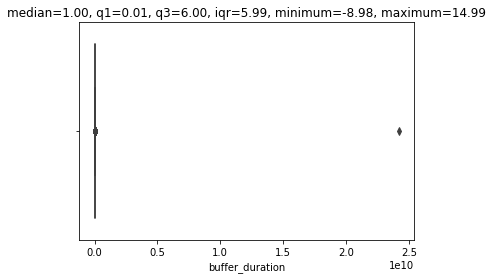

buffer_duration has 14969 outliers


In [49]:
# boxplot of buffer_duration
box_and_whisker(df, 'buffer_duration')


_, _, _, _, minimum_Col1_before, maximum_Col1_before = get_iqr_values(df, 'buffer_duration')

# count the outliers
print(f"buffer_duration has {count_outliers(df, 'buffer_duration')} outliers")



rows before removing: 93409
rows after removing: 78440


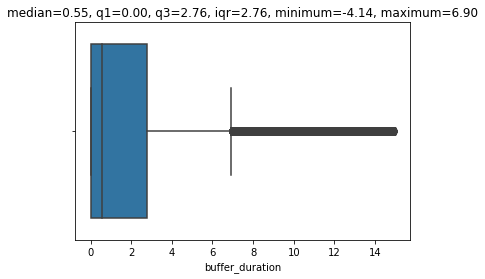

In [50]:
# remove the outliers in buffer_duration

print(f"rows before removing: {df.shape[0]}")
new_df = remove_outliers(df, 'buffer_duration')
print(f"rows after removing: {new_df.shape[0]}")

# Let's have a look at the end-result. Here is something very strange though, our data still appears to have outliers!
box_and_whisker(new_df, 'buffer_duration')


_, _, _, _, minimum_Col1_after, maximum_Col1_after = get_iqr_values(new_df, 'buffer_duration')

In [51]:
new_df.shape

(78440, 42)

In [52]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78440 entries, 0 to 93408
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype                           
---  ------             --------------  -----                           
 0   hash_content_id    78440 non-null  object                          
 1   hash_play_id       78440 non-null  object                          
 2   hash_visit_id      78440 non-null  object                          
 3   hash_watcher_id    78440 non-null  object                          
 4   hash_film_id       78440 non-null  object                          
 5   hash_event_id      78440 non-null  object                          
 6   is_login           78440 non-null  bool                            
 7   playback_location  78440 non-null  object                          
 8   platform           78440 non-null  object                          
 9   play_time          78440 non-null  datetime64[ns, Australia/Sydney]
 10  end_time  

## See the correlation between buffering duration with some categorical variables
The test will be done using ANOVA (t-test) between buffering duration as target variables and the predictors are:
1. os_name
2. browser_name
3. app_name
4. is_premium
5. content_type
6. stream_type
7. bitrate_range

Hypothesis: <br>

- Null hypothesis(H0): There's no correlation between variables.
- Alternatiive hypthosesis(Ha): There's correlation between variables.

Interpret P-value: <br>
- Accept Null hypothesis if P-value>0.05. Means variables are NOT correlated
- Reject Null hypothesis if P-value<0.05. Means variables are correlated

In [53]:
from scipy.stats import f_oneway

In [54]:
new_df.describe()

,average_bitrate,total_bytes,buffer_duration,play_duration
count,"78,440.00","78,440.00","78,440.00","78,440.00"
mean,"199,671.27","49,888,661.89",1.94,256.84
std,"141,304.97","360,611,068.21",2.95,"1,172.13"
min,144.00,0.00,0.00,0.00
25%,633.00,750.00,0.00,4.00
50%,"300,000.00","375,000.00",0.55,34.00
75%,"300,000.00","4,500,000.00",2.76,75.00
max,"300,000.00","30,920,625,000.00",14.97,"82,455.00"


### 1. os_name 

In [55]:
new_df['os_name'].unique()

array(['Android', 'REL', 'Other', 'iOS', 'Windows', 'MacOSX', 'Tizen',
       'Linux', 'WindowsPhone', 'ChromeOS', 'Ubuntu', 'BlackBerryOS'],
      dtype=object)

In [56]:
CategoryGroupLists = new_df.groupby('os_name')['buffer_duration'].apply(list)
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for ANOVA is:', AnovaResults[1])

P-Value for ANOVA is: 0.0


### 2. browser_name

In [57]:
df['browser_name'].unique()

array(['ChromeMobileWebView', 'Chrome', 'UCBrowser', 'Other',
       'ChromeMobile', 'Facebook', 'SamsungInternet', 'OperaMobile',
       'LINE', 'MiuiBrowser', 'FirefoxMobile', 'Firefox',
       'ChromeMobileiOS', 'MobileSafari', 'YandexBrowser', 'Google',
       'AppleMail', 'Safari', 'Opera', 'Puffin', 'Android', 'Flipboard',
       'Instagram', 'Edge', 'Maxthon', 'EdgeMobile',
       'MobileSafariUI/WKWebView', 'MintBrowser', 'FirefoxiOS',
       'AmazonSilk', 'HeadlessChrome', 'Flipboard-Briefing', 'Vivaldi',
       'BlackBerryWebKit', 'Chromium', 'Pinterest', 'Waterfox'],
      dtype=object)

In [58]:
CategoryGroupLists = new_df.groupby('browser_name')['buffer_duration'].apply(list)
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for ANOVA is:', AnovaResults[1])

P-Value for ANOVA is: 0.0


### 3. app_name 

In [59]:
df['app_name'].unique()

array(['vidio', 'liputan6', 'bola'], dtype=object)

In [60]:
CategoryGroupLists = new_df.groupby('app_name')['buffer_duration'].apply(list)
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for ANOVA is:', AnovaResults[1])

P-Value for ANOVA is: 0.8106108827089065


### 4. is_premium

In [61]:
df['is_premium'].unique()

array([False,  True])

In [62]:
CategoryGroupLists = new_df.groupby('is_premium')['buffer_duration'].apply(list)
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for ANOVA is:', AnovaResults[1])

P-Value for ANOVA is: 2.502296758622964e-25


### 5. content_type

In [63]:
df['content_type'].unique()

array(['vod', 'livestreaming', 'catchup'], dtype=object)

In [64]:
CategoryGroupLists = new_df.groupby('content_type')['buffer_duration'].apply(list)
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for ANOVA is:', AnovaResults[1])

P-Value for ANOVA is: 0.0


### 6. stream_type

In [65]:
df['stream_type'].unique()

array(['TvStream', 'EventStream'], dtype=object)

In [66]:
CategoryGroupLists = new_df.groupby('stream_type')['buffer_duration'].apply(list)
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for ANOVA is:', AnovaResults[1])

P-Value for ANOVA is: 0.33824774792780676


### 6. bitrate_range

In [67]:
df['bitrate_range'].unique()

array(['200-500', '0-200', 'unknown'], dtype=object)

In [68]:
CategoryGroupLists = new_df.groupby('bitrate_range')['buffer_duration'].apply(list)
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for ANOVA is:', AnovaResults[1])

P-Value for ANOVA is: 8.796529081548835e-56


**Notes:**<br>
From the result of ANOVA test above we can see that **OS, Browser, Premium Account, Content, and Bitrate Range** is having correlation with the duration of buffering. 

However, **App and Stream Type** didn't have any correlation with the duration of buffering.

## See the correlation between buffering duration with some numerical variables
The correlation matrix between buffering duration as target variables and the predictors are:
1. average_bitrate
2. total_bytes
3. play_duration

In [69]:
df.describe()

,average_bitrate,total_bytes,buffer_duration,play_duration
count,"93,409.00","93,409.00","93,409.00","93,409.00"
mean,"204,548.89","82,038,889.14","259,434.47",396.97
std,"139,501.89","491,093,252.26","79,181,003.58","1,560.81"
min,144.00,0.00,0.00,0.00
25%,700.00,750.00,0.01,5.00
50%,"300,000.00","585,000.00",1.00,41.00
75%,"300,000.00","11,250,000.00",6.00,115.00
max,"300,000.00","30,920,625,000.00","24,200,000,000.00","82,455.00"


In [70]:
df_corr = df[['buffer_duration','average_bitrate','total_bytes','play_duration']].copy()

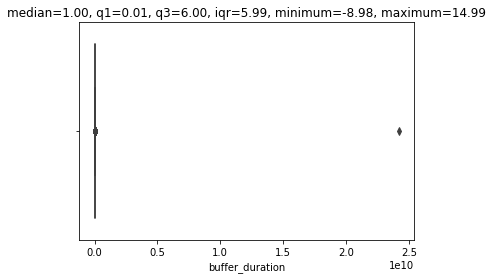

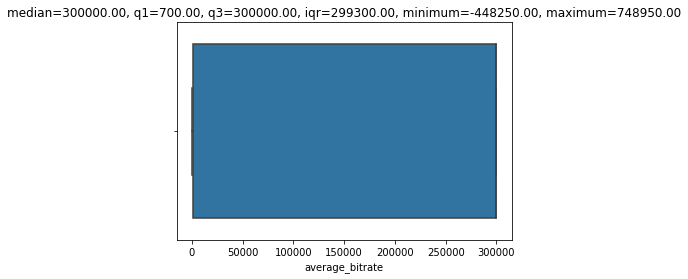

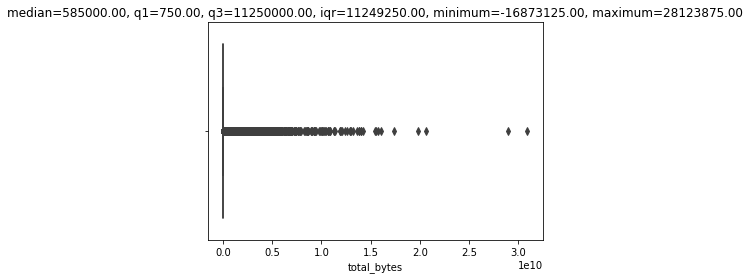

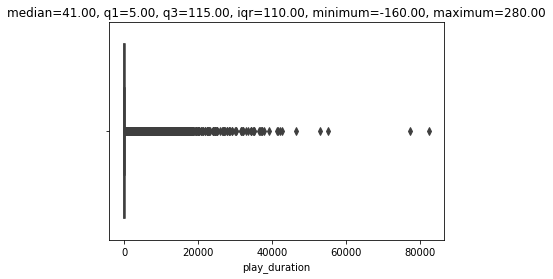

buffer_duration has 14969 outliers
average_bitrate has 0 outliers
total_bytes has 16087 outliers
play_duration has 15768 outliers


In [71]:
# boxplot of the df_cor
box_and_whisker(df_corr, 'buffer_duration')
box_and_whisker(df_corr, 'average_bitrate')
box_and_whisker(df_corr, 'total_bytes')
box_and_whisker(df_corr, 'play_duration')


_, _, _, _, minimum_Col1_before, maximum_Col1_before = get_iqr_values(df, 'buffer_duration')

# %% Count the outliers in the original data frame
print(f"buffer_duration has {count_outliers(df_corr, 'buffer_duration')} outliers")
print(f"average_bitrate has {count_outliers(df_corr, 'average_bitrate')} outliers")
print(f"total_bytes has {count_outliers(df_corr, 'total_bytes')} outliers")
print(f"play_duration has {count_outliers(df_corr, 'play_duration')} outliers")

In [72]:
df_corr

,buffer_duration,average_bitrate,total_bytes,play_duration
0,0.00,"300,000.00",0,0
1,0.00,600.00,750,0
2,27.10,700.00,875,4
3,0.09,"300,000.00",0,0
4,5.00,"300,000.00",0,0
...,...,...,...,...
93404,5.00,"300,000.00",157500000,420
93405,0.00,375.00,126563,270
93406,1.00,"300,000.00",11250000,30
93407,1.37,"300,000.00",2812500,75


rows before removing: 93409
rows after removing: 58056


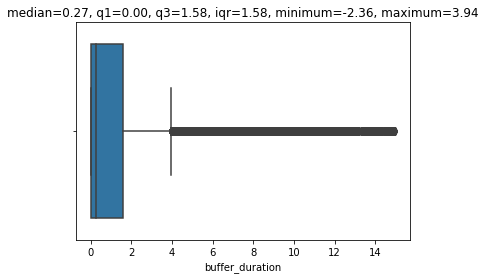

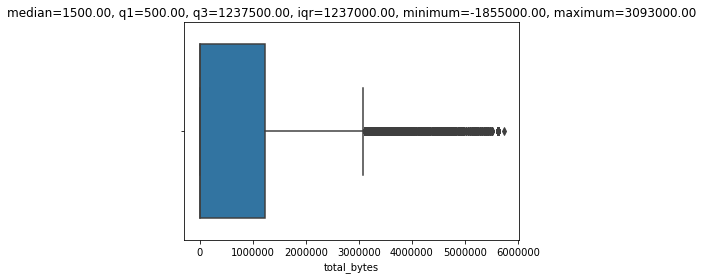

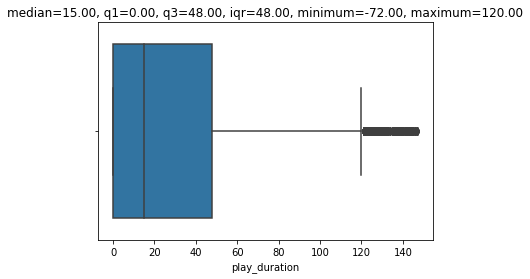

In [73]:
# remove the outliers
print(f"rows before removing: {df_corr.shape[0]}")
df_corr = remove_outliers(df_corr, 'buffer_duration')
df_corr = remove_outliers(df_corr, 'total_bytes')
df_corr = remove_outliers(df_corr, 'play_duration')
print(f"rows after removing: {df_corr.shape[0]}")

# Let's have a look at the end-result. Here is something very strange though, our data still appears to have outliers!
box_and_whisker(df_corr, 'buffer_duration')
box_and_whisker(df_corr, 'total_bytes')
box_and_whisker(df_corr, 'play_duration')

_, _, _, _, minimum_Col1_after, maximum_Col1_after = get_iqr_values(df_corr, 'buffer_duration')
_, _, _, _, minimum_Col1_after, maximum_Col1_after = get_iqr_values(df_corr, 'total_bytes')
_, _, _, _, minimum_Col1_after, maximum_Col1_after = get_iqr_values(df_corr, 'play_duration')

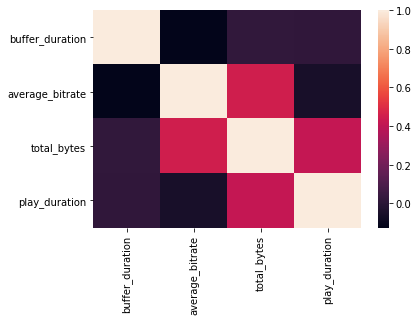

In [74]:
# calculate the correlation matrix
corr = df_corr.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [75]:
df_corr.corr()

,buffer_duration,average_bitrate,total_bytes,play_duration
buffer_duration,1.00,-0.13,0.02,0.02
average_bitrate,-0.13,1.00,0.45,-0.06
total_bytes,0.02,0.45,1.00,0.42
play_duration,0.02,-0.06,0.42,1.00


**Notes:**<br>
From the correlation matrix above, we could see that **Average Bitrate, Total Bytes, and Play Duration didn't have any correlation towards the buffering duration.**

<a id='e'></a>

## 5. Conclusion

### The insight from this datasets
From the EDA conducted, some of important insights are:
1. Most of the visitors didn't log in and not premium visitors.
2. Most of them access Vidio via web-mobile using Facebook. This means that Vidio's contents are mostly spread in the Facebook and attract its user to access it directly from Facebook. 
3. 75% of the visitors in this dataset ever suffer buffering problem.

Buffering problem might caused by several factors. In the analysis in [here](#d), I consider Average Bitrate, Total Bytes,  Play Duration, OS, Browser Name, App Name, Premium, Content Type, Stream Type, and Bitrate Range to see how it correlate with the Buffer Duration. By using ANOVA test for the categorical variables and Correlation Matrix for the numerical variables, the result shows that  **OS, Browser, Premium Account, Content, and Bitrate Range** correlated with Buffer Duration

### What is the platform that user keenly used to watch? And how do you convince us that user are keenly watch on that platform?
<a id='g'></a>
Based on the analysis in [here](#f):

1. The users mostly use their browser for in their phone **(web-mobile)** to access the content in Vidio.
2. If we see the play duration, the plaform that has the longest play-duration is app-android. 
3. From those 54717 visitors that use web mobile as the platform, most of them are watching Video on Demand.
4. The visitors that use web mobile as the platform, they mostly access with Facebook and Chrome browser.
5. All of the web-mobile visitors are having TV Streaming.

### Top 10 visitors by using play_duration per day
<a id='y'></a>

Based on the analysis in [here](#z) these are the top 10 visitors based on the total play duration per day 


In [76]:
play_duration_day.head(10)

,play_day,hash_watcher_id,play_duration
0,2020-02-06,e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b93...,129705
1,2020-02-03,e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b93...,114402
2,2020-02-14,1037f78e497361fcf21323b537e1f05264f26ee233697c...,82455
3,2020-02-09,8396a2cdf048462cb24f81225433524783116200a71bc5...,77280
4,2020-02-09,e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b93...,71704
5,2020-02-02,e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b93...,69735
6,2020-02-13,e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b93...,67505
7,2020-02-10,e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b93...,63995
8,2020-02-16,e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b93...,55980
9,2020-02-04,e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b93...,55725
